<a href="https://colab.research.google.com/github/luizfilipisousamoura/QuantumComputing/blob/main/QuantumComputingWithQiskit/34_DeutchJozsaAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 KB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.9/929.9 KB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 

In [ ]:
!pip3 install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=e3ed2f5b91d82302d64630403902b73206d5e11e0b3304a694610d7fd357704a
  Stored in directory: /root/.cache/pip/wheels/72/99/be/81d9bcdf5dd5ee5acd8119a9dd5bc07204c9ce205fd341b021
Successfully built pylatexenc


In [ ]:
bitstring = '10101100'
n = len(bitstring)

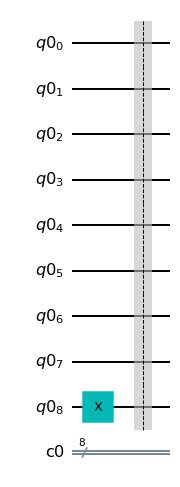

In [ ]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
q = QuantumRegister(n+1)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
qc.x(q[n])
qc.barrier()
qc.draw('mpl')

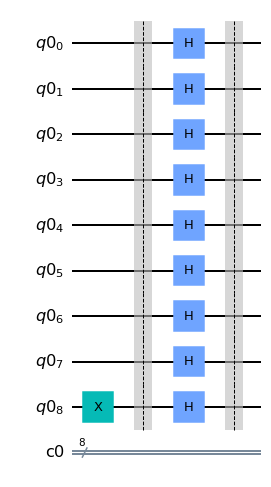

In [ ]:
for i in range(n+1):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

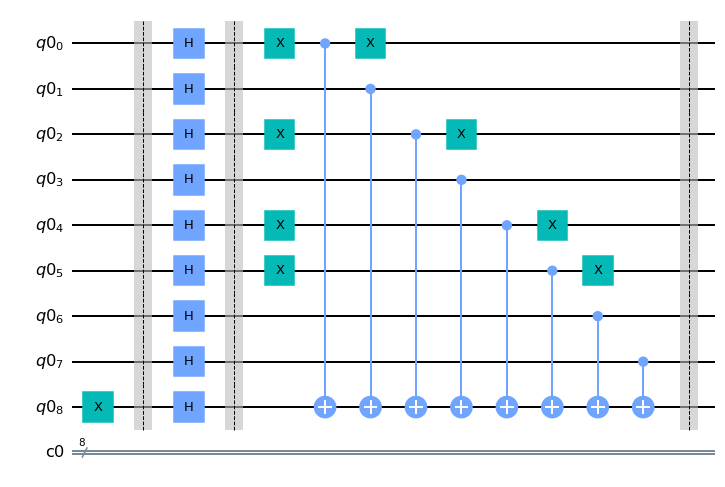

In [ ]:
function = 'Balanced'
if function == 'Balanced':
    for i in range(n):
        if bitstring[i]=='1':
            qc.x(q[i])
        qc.cx(q[i],q[n])
        if bitstring[i]=='1':
            qc.x(q[i])
elif function=='Constant':
    qc.i(q[n])
qc.barrier()
qc.draw('mpl')

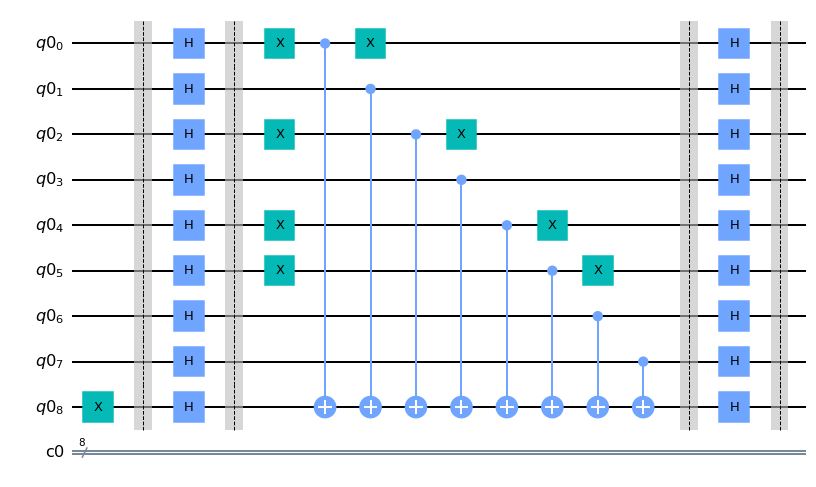

In [ ]:
for i in range(n+1):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

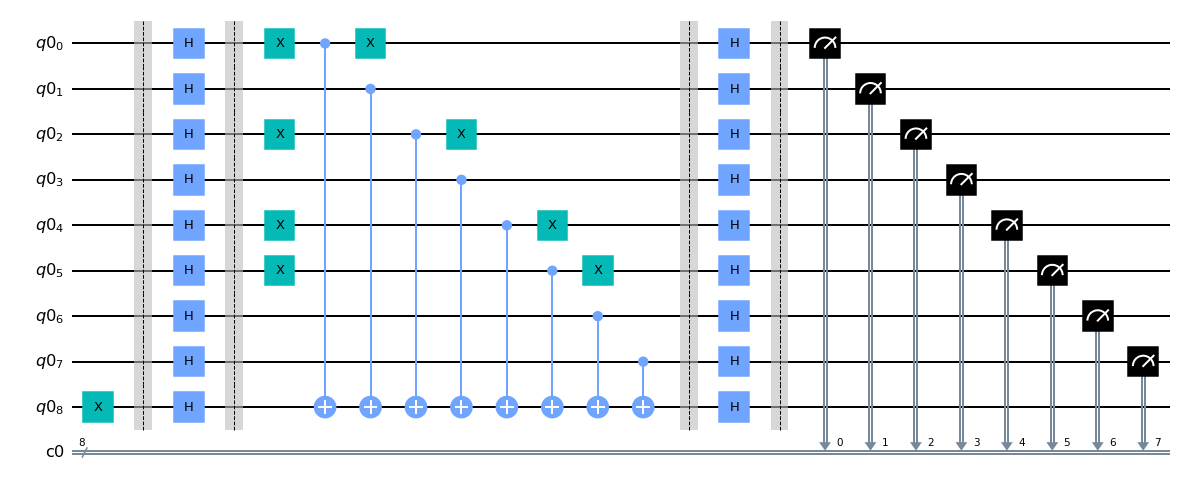

In [ ]:
for i in range(n):
    qc.measure(q[i],c[i])
qc.draw('mpl')

{'11111111': 1024}


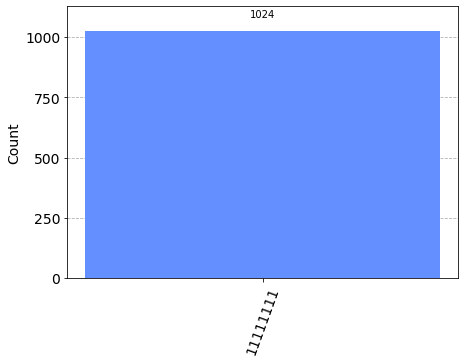

In [ ]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
from qiskit.test.mock import FakeGuadalupe
device_simulation= FakeGuadalupe()

<ipython-input-10-168f0c9d5e1e>:1: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeGuadalupe


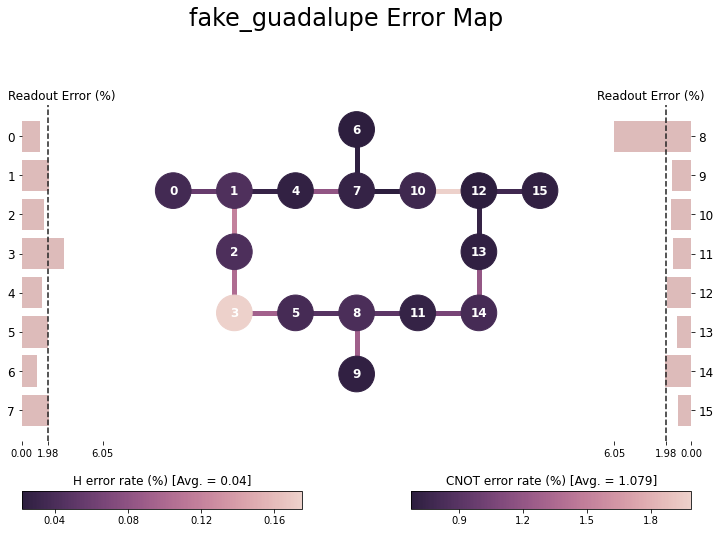

In [ ]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulation)

In [ ]:
qc2 = transpile(qc, device_simulation)

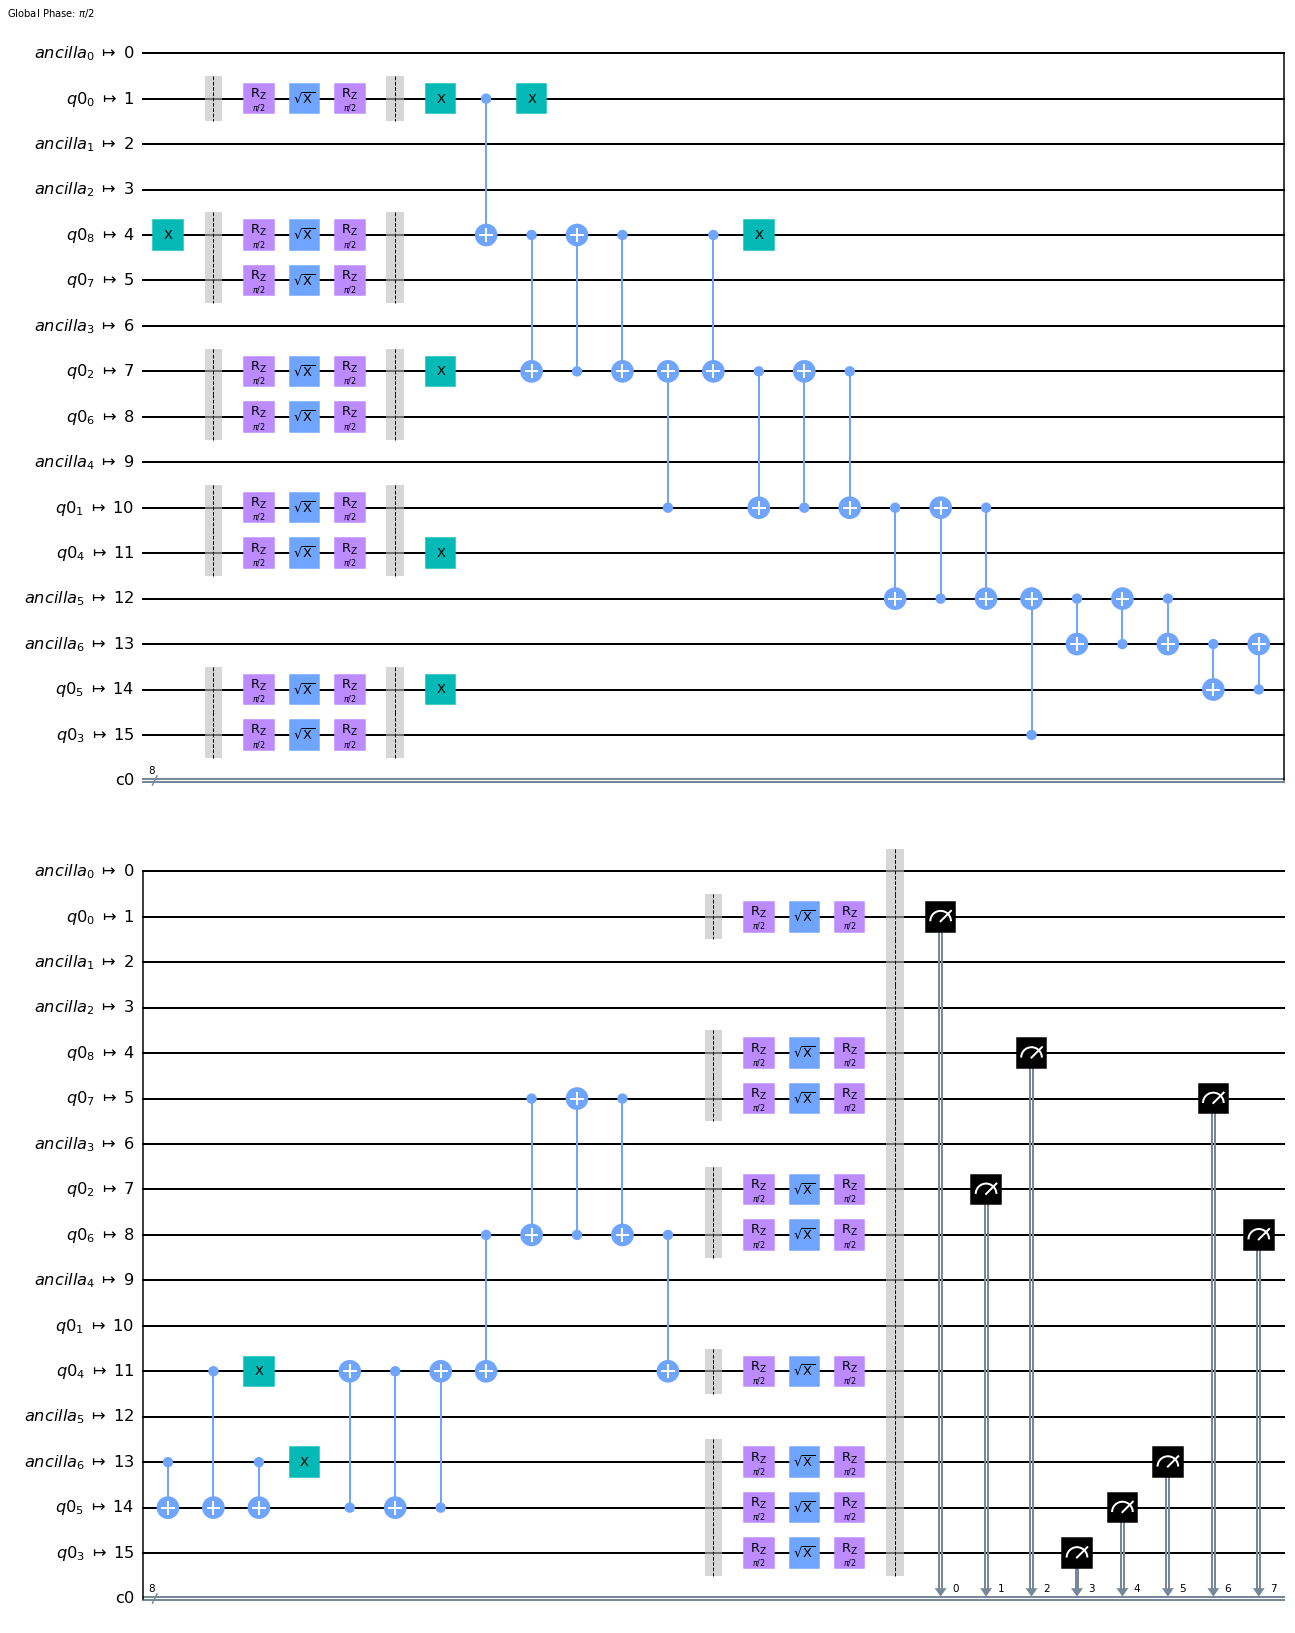

In [ ]:
qc2.draw('mpl')

{'10000001': 1, '01111001': 1, '01010111': 2, '10000100': 1, '01110101': 1, '00111100': 1, '10100111': 1, '10011101': 1, '11110001': 3, '00000100': 1, '01000101': 3, '00111110': 2, '00110001': 1, '00010011': 1, '01110001': 1, '01101011': 1, '10010111': 1, '10101011': 2, '00001001': 1, '00011110': 2, '01000111': 2, '00101110': 1, '01011101': 1, '10000110': 1, '01111010': 1, '00000011': 30, '01101101': 2, '01011111': 9, '11010010': 1, '01011110': 1, '11101101': 8, '01101111': 25, '11001111': 11, '11111101': 146, '00111111': 101, '11101110': 6, '00000101': 77, '10111110': 6, '01111111': 425, '11111110': 154, '00000001': 62, '11110110': 1, '10111111': 153, '00010000': 1, '11111100': 8, '11101011': 9, '11011111': 129, '00000111': 203, '01010101': 1, '11111111': 3484, '00000010': 3, '11101111': 198, '10000111': 6, '11111011': 141, '00001011': 6, '01111110': 15, '11100111': 7, '01100111': 1, '11110011': 3, '11110111': 80, '00101111': 84, '00011111': 28, '10110110': 1, '11001110': 1, '00001100

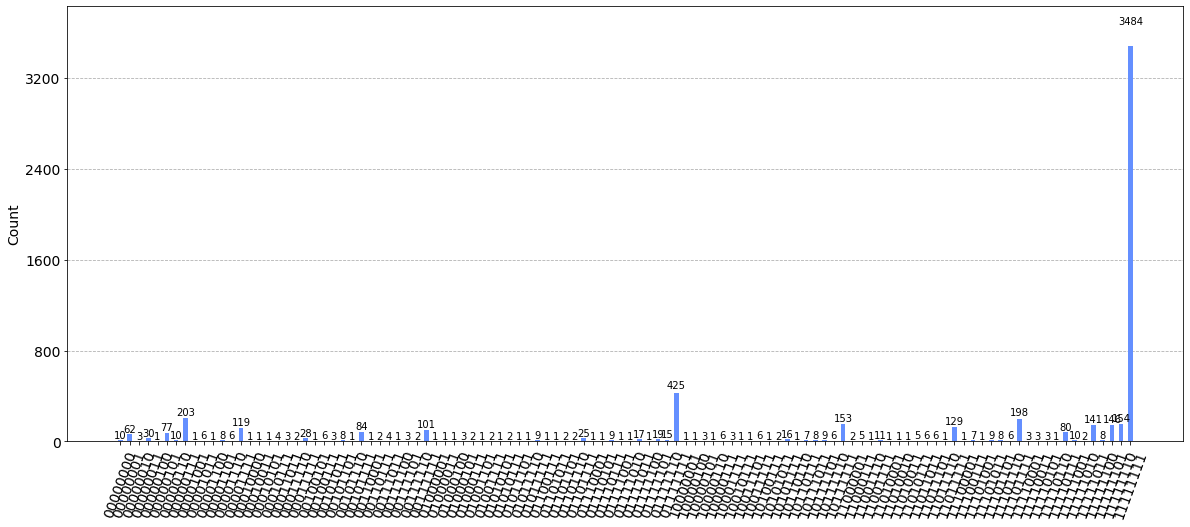

In [ ]:
job = device_simulation.run(qc2,shots = 6000)
result = job.result()
counts = result.get_counts()
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(20,8))